In [848]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [849]:
# Observacion de los primeros datos de la base de datos

oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [850]:
# Compruebo campos nulos en la base de datos
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [851]:
# Remuevo los campos nulos de la base datos

oportunidades = oportunidades.dropna()
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10115 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  10115 non-null  int64         
 1   Region                              10115 non-null  object        
 2   Territory                           10115 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  10115 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    10115 non-null  int64         
 5   Bureaucratic_Code_0_Approval        10115 non-null  int64         
 6   Bureaucratic_Code_0_Approved        10115 non-null  int64         
 7   Submitted_for_Approval              10115 non-null  int64         
 8   Bureaucratic_Code                   10115 non-null  object        
 9   Account_Created_Date                10115 non-null  datetime64[ns]
 10  Source                

In [852]:
# Corroboro que tengo en la columna region
oportunidades['Region'].value_counts()

EMEA           3978
APAC           2256
Americas       2187
Japan          1528
Middle East     166
Name: Region, dtype: int64

In [853]:
# Claramente hay un error en los datos en region ya que japon pertenece a APAC
# por lo cual pasamos a reemplazar todos los campos en region que contengan a japon

oportunidades = oportunidades.replace({'Japan':'APAC'})
oportunidades['Region'].value_counts()

EMEA           3978
APAC           3784
Americas       2187
Middle East     166
Name: Region, dtype: int64

In [854]:
# Corroboro que tengo en la columna territorio
oportunidades['Territory'].value_counts()

Germany            1345
None               1336
NW America          950
India               782
APAC                582
                   ... 
Egypt                 1
Monaco                1
Kosovo                1
Solomon Islands       1
Sweden                1
Name: Territory, Length: 76, dtype: int64

In [855]:
# Se filtraron los paises con valores none por no representar fisicamente ninguna tipo información geografica
# para nuestro objetivo de optimizar los esfuerzos de cada representate comercial
oportunidades = oportunidades.loc[oportunidades['Territory'] != 'None']

In [856]:
# Se condensan las cuatro columnas binarias en una unica que tiene la informacion necesaria

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']
filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']
oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Quote_Appr'\
    ,'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
        , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')
oportunidades_posibles = (filtro_terminos_entrega & filtro_codigo_burocratico)
oportunidades.insert(3,'Es_Oportunidad_Posible', oportunidades_posibles)
oportunidades['Es_Oportunidad_Posible'] = oportunidades['Es_Oportunidad_Posible'].replace(
    {True:1, False:0})
oportunidades

,ID,Region,Territory,Es_Oportunidad_Posible,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,Bureaucratic_Code_4,2015-10-13,None,India,Account_Name_1147,Opportunity_Name_7036,...,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,EMEA,Norway,1,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,...,Q2,2016,NaT,1,EUR,401700.00,EUR,401700.0,Closed Won,Prod_Category_A_None
16940,20827,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16941,20830,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16945,28561,Americas,NE America,1,Bureaucratic_Code_4,2015-10-20,None,United States,Account_Name_944,Opportunity_Name_5843,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [857]:
# Analizamos los territorios en los cuales son factibles las oportunidades por cumplir las condiciones
# necesarias a priori

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})
#oportunidades_factibles_trtr.plot(kind = 'bar', title = 'Oportunidades posibles por pais'\
#    , linewidth = 2, figsize = (15,6))
#ax = plt.gca()
#ax.set_ylabel('Numero de oportunidades')
#ax.set_xlabel('Paises')
#plt.show()

In [858]:
# Analizamos los territorios en los cuales no son factibles las oportunidades por no cumplir las condiciones
# necesarias a priori

def contar_ceros(x):
    return (x.count() - x.sum())

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})
#oportunidades_no_factibles_trtr.plot(kind = 'bar', title = 'Oportunidades no posibles por pais'\
#    , linewidth = 2, figsize = (15,6))
#ax = plt.gca()
#ax.set_ylabel('Numero de no oportunidades')
#ax.set_xlabel('Paises')
#plt.show()

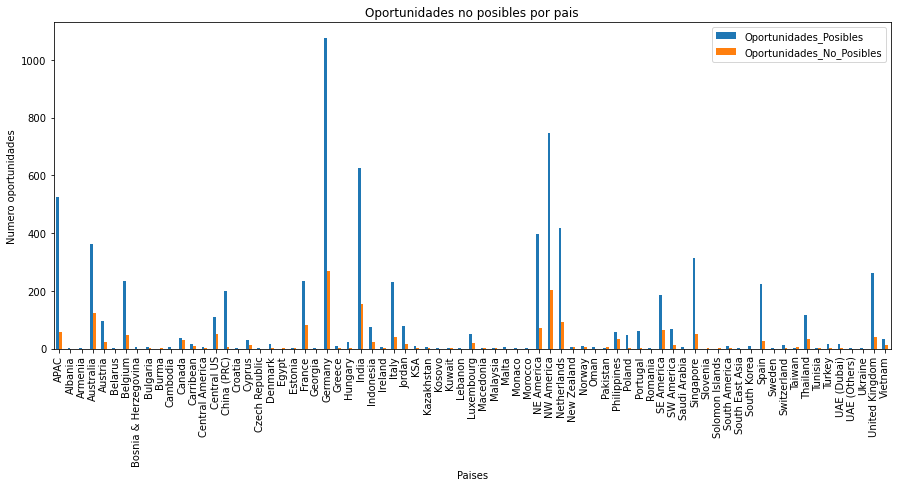

In [859]:
# Gráfico de barras preliminar para tener una vision de en cuales paises tenemos mayor probabilidad
# de al menos conseguir una oportunidad 
# Con esto nos damos cuenta que paises como alemania, japan, india tienen una gran cantidad de
# oportunidades aceptadas en cuanto a requisitos en, relacion a las oportunidades que no fueron aceptadas

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_posibles_por_territorio.plot(kind = 'bar', title = 'Oportunidades no posibles por pais'\
    , linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Numero oportunidades')
ax.set_xlabel('Paises')
plt.show()

In [860]:
# Se realiza un ultimo filtro para quedarnos solamente con los datos que corresponden a 
# oportunidades que son realmente posibles por no tener ningun inconveniente en aprobacion o en algun tipo
# de burocracia

oportunidades = oportunidades.loc[oportunidades['Es_Oportunidad_Posible'] == 1]
oportunidades = oportunidades.drop('Es_Oportunidad_Posible', axis = 'columns')
oportunidades = oportunidades.reset_index()
oportunidades = oportunidades.drop('index', axis = 'columns')
oportunidades.tail(5)

,ID,Region,Territory,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
7126,17680,EMEA,Germany,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,...,Q1,2016,NaT,0,EUR,56193.75,EUR,528918.75,Closed Won,Prod_Category_A_None
7127,17683,EMEA,Germany,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,...,Q1,2016,NaT,1,EUR,413400.00,EUR,528918.75,Closed Won,Prod_Category_A_None
7128,18324,EMEA,Norway,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,12799,...,Q2,2016,NaT,1,EUR,401700.00,EUR,401700.00,Closed Won,Prod_Category_A_None
7129,28561,Americas,NE America,Bureaucratic_Code_4,2015-10-20,None,United States,Account_Name_944,Opportunity_Name_5843,12802,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.00,Closed Lost,Prod_Category_A_None
7130,28318,Americas,NE America,Bureaucratic_Code_4,2015-09-03,None,United States,Account_Name_1401,Opportunity_Name_9911,12803,...,Q3,2016,NaT,40,USD,25603200.00,USD,0.00,Closed Lost,Prod_Category_A_None


In [861]:
##################################################################################################################
##################################################################################################################
#    LO DE ARRIBA IRIA BASICAMENTE TODO LO RELACIONADO A CASTEOS Y LIMPIEZA DE DATOS APARTIR DE ABAJO SE PUEDE   #
#              COMENZAR A ANALIZAR LA BASE DA DATOS EN FUNCION AL TARGET QUE TENEMOS QUE ES EL STAGE             #
#      SI DEBEMOS CASTEAR ALGO MAS O FILTRAR ALGO NUEVO LO HAREMOS ARRIBA PARA SEPARAR DEL ANALISIS DEL TARGET   #
##################################################################################################################
##################################################################################################################